In [ ]:
# importing libraries
import pandas as pd
import numpy as np
#reading the data
df=pd.read_csv('/content/NSE-TATAGLOBAL11.csv')
#looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)
#setting the index as date
df ['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index =df ['Date']
#creating dataframe with date and the target variable
data=df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame (index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'] [i] = data['Date'][i]
    new_data['Close'][i] = data['Close'] [i]
#NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year's data into validation and the 4 years' data before that into train set.
#splitting into train and validation
train=new_data[:987]
valid=new_data[987:]
#shapes of training set
print('\n Shape of training set:')
print(train.shape)
#shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)
#In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
#making predictions
preds = []
for i in range(0,valid.shape[0]):
    a=train['Close'] [len(train)-248+i:].sum()+sum(preds)
    b = a/248
    preds.append(b)
#checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print(rms)
print('\n PMSE value on validation set:')

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  

 Shape of the data:
(1235, 8)

 Shape of training set:
(987, 2)

 Shape of validation set:
(248, 2)
104.51415465984348

 PMSE value on validation set:


<ipython-input-7-aa11af613fca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-7-aa11af613fca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


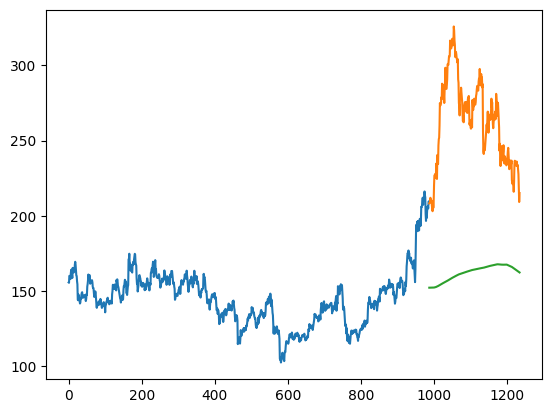

In [ ]:
#plot
import matplotlib.pyplot as plt

valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])



248


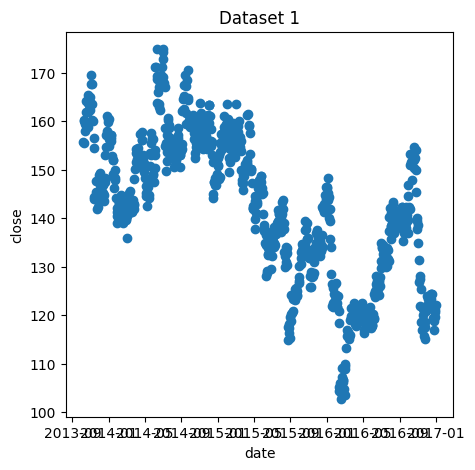

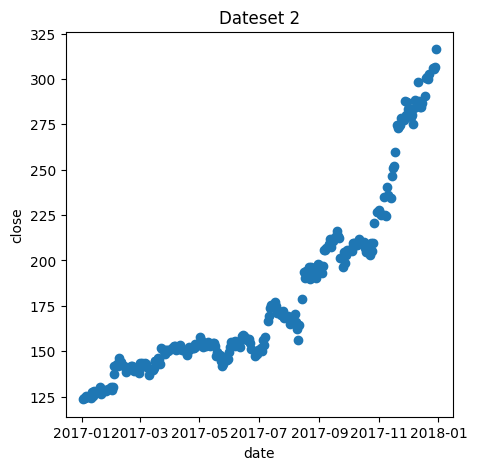

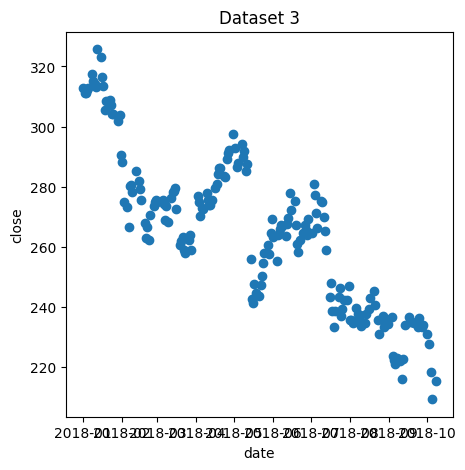

In [ ]:

#finding RMSE using 90-10 training testing set
import pandas as pd
import numpy as np
#import statsmodels.api as sm
dframe=pd.read_csv('/NSE-TATAGLOBAL11.csv')
close=dframe ['Close']
dframe['Date']=pd.to_datetime(dframe['Date'])
dframe['year']=dframe['Date'].dt.year



cls1=dframe[dframe.year<2017]
cls2=dframe[dframe.year==2017]
cls3=dframe[dframe.year>=2018]
print(len(cls2.Date))
close1=dframe[dframe.year<2017].Close
close2=dframe[dframe.year==2017].Close
close3=dframe[dframe.year>=2018].Close




import matplotlib.pyplot as plt

#plot 1
plt.figure(figsize=(5,5))
plt.scatter(cls1.Date,close1)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Dataset 1')
plt.show()

#plot 2
plt.figure(figsize=(5,5))
plt.scatter(cls2.Date,close2)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Dateset 2')
plt.show()

#plot 3
plt.figure(figsize=(5,5))
plt.scatter(cls3.Date,close3)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Dataset 3')
plt.show()

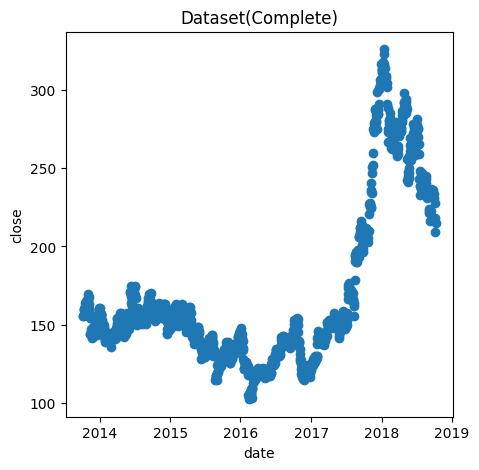

In [ ]:
#plot complete
plt.figure(figsize=(5,5))
plt.scatter(dframe['Date'],close)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Dataset(Complete)')
plt.show()

In [ ]:
#applying linear regression on 1st cluster ie <2017
cls1['Date'] = pd.to_datetime(cls1.Date, format='%Y-%m-%d')
cls1.index=cls1['Date']
#creating dataframe with date and the target variable
data=cls1.sort_index(ascending=True, axis=0)
new_data=pd.DataFrame (index=range(0,len(cls1)),columns=['Date', 'Close'])


for i in range(0,len(data)):
    new_data['Date'] [i]= data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
#NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year's data into validation and the 4 years data before that into train set.
#splitting into train and validation
train=new_data[:650]
valid=new_data [650:]
#In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
#making predictions
preds = []
for i in range(0, valid.shape[0]):
    a=train['Close'] [len(train)-147+i:].sum()+sum(preds)
    b=a/147
    preds.append(b)
#checking the results (RMSE value)
rms1=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n PMSE value on validation set for 1st split:')
print(rms1)


 PMSE value on validation set for 1st split:
15.576217200695408


<ipython-input-13-6a341b9f373e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls1['Date'] = pd.to_datetime(cls1.Date, format='%Y-%m-%d')


In [ ]:
#applying linear regression on 2nd cluster ie between 2017 and 2018
cls2['Date']= pd.to_datetime(cls2.Date,format='%Y-%m-%d')
cls2.index=cls2['Date']
#creating dataframe with date and the target variable
data=cls2.sort_index(ascending=True, axis=0)
new_data=pd.DataFrame (index=range(0,len(cls2)),columns=['Date', 'Close'])
for i in range(0,len(data)):
     new_data['Date'] [i]= data['Date'] [i]
     new_data['Close'] [i] = data['Close'] [i]
#NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year's data into validation and the 4 years data before that into train set.
#splitting into train and validation
train=new_data[:240]
valid=new_data[240:]
#In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
#making predictions
preds = []
for i in range(0,valid.shape[0]):
   a=train['Close'] [len(train)-8+i:].sum()+sum(preds)
   b = a/8
   preds.append(b)
#checking the results (RMSE value)
rms2=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n PMSE value on validation set for 2nd split:')
print(rms2)


 PMSE value on validation set for 2nd split:
17.5044287709972


<ipython-input-14-dbc873fca51c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls2['Date']= pd.to_datetime(cls2.Date,format='%Y-%m-%d')


In [ ]:
#applying linear rgeression on 3 cluster ie >2018
cls3['Date'] = pd.to_datetime(cls3.Date,format='%Y-%m-%d')
cls3.index=cls3['Date']
#creating dataframe with date and the target variable
data=cls3.sort_index(ascending=True, axis=0)
new_data=pd.DataFrame(index=range(0,len(cls3)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i]= data['Date'] [i]
    new_data['Close'] [i] = data['Close'][i]
#NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will dest roy the time component. So here we have set the last year's data into validation and the 4 years' data before that into train set.
#splitting into train and validation
train=new_data[:160]
valid=new_data [160:]
#In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
#making predictions
preds = []
for i in range(0,valid.shape[0]):
   a=train['Close'] [len(train)-30+i:].sum()+sum(preds)
   b = a/30
   preds.append(b)
#checking the results (RMSE value)
rms3=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print(rms3)
print('\n PMSE value on validation set for 3rd split:')


#calculating average rase on whole dataset
print("\nAverage PMSE value of dataset")
print((rms1+rms2+rms3)/3)


13.163982513387612

 PMSE value on validation set for 3rd split:

Average PMSE value of dataset
15.414876161693408


<ipython-input-15-f19638bc8b68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls3['Date'] = pd.to_datetime(cls3.Date,format='%Y-%m-%d')
